In [135]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from sympy import re,im,I, symbols 

In [136]:
x= sym.symbols("x",real=True)
y= sym.symbols("y",real=True)

In [137]:
z=x+sym.I*y
z

x + I*y

In [138]:
ecuacion= z**3-1
ecuacion

(x + I*y)**3 - 1

In [139]:
F = [sym.re(ecuacion),sym.im(ecuacion)]
print(F)

[x**3 - 3*x*y**2 - 1, 3*x**2*y - y**3]


In [140]:
d_x=sym.diff(F[0],x,1)
d_x_2=sym.diff(F[1],x,1)
d_y=sym.diff(F[0],y,1)
d_y_2=sym.diff(F[1],y,1)
J = sym.Matrix([[d_x,d_y],[d_x_2,d_y_2]])
print(J)

Matrix([[3*x**2 - 3*y**2, -6*x*y], [6*x*y, 3*x**2 - 3*y**2]])


In [141]:
Fn = sym.lambdify([x,y],F,"numpy")
Jn = sym.lambdify([x, y], J, 'numpy')

In [142]:
def Newton_Raphson_generalizado(z0, Fn, Jn, max_it=10000, tol=1e-7):
    for it in range(max_it):
        F_Real = np.array(Fn(z0[0], z0[1]), dtype=np.complex128)
        J_Real = np.array(Jn(z0[0], z0[1]), dtype=np.complex128)
        
        if np.linalg.det(J_Real) != 0:
            inversa = np.linalg.inv(J_Real)
            resultado = z0 - np.dot(inversa, F_Real)
            
            if np.linalg.norm(resultado - z0) < tol:
                return resultado
            
            z0 = resultado
print(Newton_Raphson_generalizado([0.5, 0.5], Fn, Jn))

[-0.5      +0.j  0.8660254+0.j]


In [143]:
N=300
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)

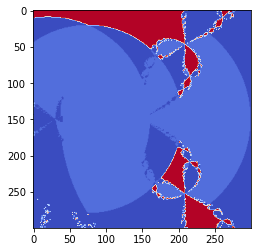

In [144]:

Fractal = np.zeros((N,N), np.int64)

x, y = np.meshgrid(x, y)
z0 = x + 1j*y

for i in range(N):
    for j in range(N):
        zn = Newton_Raphson_generalizado([z0[i,j].real, z0[i,j].imag], Fn, Jn)
        d1 = np.abs(zn - z0[i,j])
        d2 = np.abs(zn - z1)
        d3 = np.abs(zn - z2)
        dmin = np.minimum(d1, np.minimum(d2, d3))
        if np.all(dmin == d1):
            Fractal[i,j] = 20
        elif np.all(dmin == d2):
            Fractal[i,j] = 100
        elif np.all(dmin == d3):
            Fractal[i,j] = 255
plt.imshow(Fractal, cmap='coolwarm')
plt.show()